<a href="https://colab.research.google.com/github/Eligeti-13/Bookscape_repo/blob/main/Power_Pulse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Import Packages**

In [ ]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("household_power_consumption.txt", sep=';', header=0)

In [ ]:
data.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [ ]:
data.replace('?', np.nan, inplace=True)

In [ ]:
# Convert 'Date' and 'Time' columns to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [ ]:
# Convert other columns to numeric, coercing errors
data_numeric = data.copy()  # Create a copy of the original DataFrame
numeric_columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [ ]:
# Convert only the numeric columns
data_numeric[numeric_columns] = data_numeric[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
data.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00               4.216                 0.418  234.840   
1 2006-12-16  17:25:00               5.360                 0.436  233.630   
2 2006-12-16  17:26:00               5.374                 0.498  233.290   
3 2006-12-16  17:27:00               5.388                 0.502  233.740   
4 2006-12-16  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0

In [ ]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [ ]:
data.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00               4.216                 0.418  234.840   
1 2006-12-16  17:25:00               5.360                 0.436  233.630   
2 2006-12-16  17:26:00               5.374                 0.498  233.290   
3 2006-12-16  17:27:00               5.388                 0.502  233.740   
4 2006-12-16  17:28:00               3.666                 0.528  235.680   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  Year  Month  \
0           18.400          0.000          1.000            17.0  2006     12   
1           23.000          0.000          1.000            16.0  2006     12   
2           23.000          0.000          2.000            17.0  2006     12   
3           23.000          0.000          1.000            17.0  2006     12   
4           15.800          0.000          1.000            17.0  2006     12   

   Day  
0   16  
1   16  
2   16  
3   16  
4   16

In [ ]:
data.isnull().sum()

Date                        0
Time                        0
Global_active_power      3732
Global_reactive_power    3732
Voltage                  3732
Global_intensity         3732
Sub_metering_1           3733
Sub_metering_2           3733
Sub_metering_3           3733
Year                        0
Month                       0
Day                         0
dtype: int64

In [ ]:
columns_to_fill = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
                   'Sub_metering_3']

data[columns_to_fill] = data[columns_to_fill].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean of each column
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())

In [ ]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
Month                    0
Day                      0
dtype: int64

In [ ]:
data['Global_active_power'].isnull().sum()

0

# **Duplicates Check**

In [ ]:
data.duplicated().sum()

0

# **Finding Outliers**

In [ ]:
import seaborn as sns

In [ ]:
df1 = pd.DataFrame({
    "out": data['Global_active_power']
})


In [ ]:
df1

out
0       4.216000
1       5.360000
2       5.374000
3       5.388000
4       3.666000
...          ...
652243  0.502000
652244  0.500000
652245  0.480000
652246  2.162000
652247  1.173055

[652248 rows x 1 columns]

# **1. Square Root Transformation(sqrt)**

In [ ]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')

<Axes: ylabel='Global_active_power'>

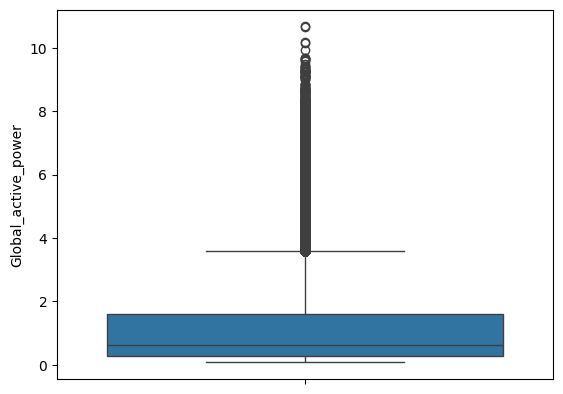

In [ ]:
sns.boxplot(data['Global_active_power'])

In [ ]:
df1['sqrt'] = np.sqrt(df1['out'])

<Axes: ylabel='sqrt'>

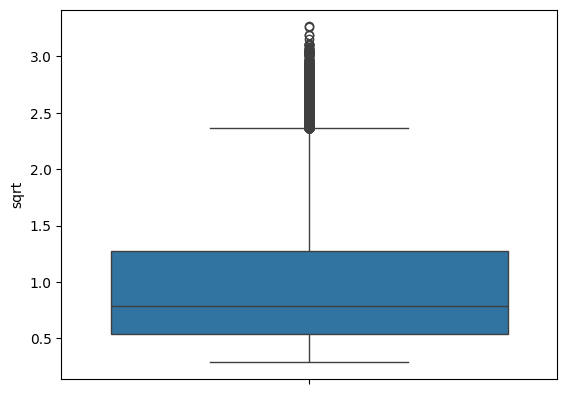

In [ ]:
sns.boxplot(df1['sqrt'])

# **log2 and log10 Transformation**

In [ ]:
df1['log2'] = np.log2(df1['out'])
df1['log10'] = np.log10(df1['out'])

<Axes: ylabel='log2'>

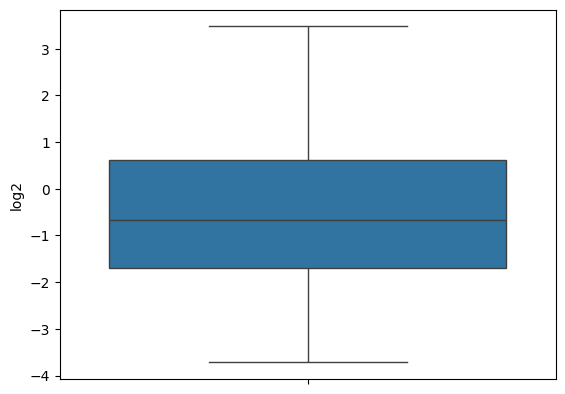

In [ ]:
sns.boxplot(df1['log2'])

-- the outlier was solved

<Axes: ylabel='log10'>

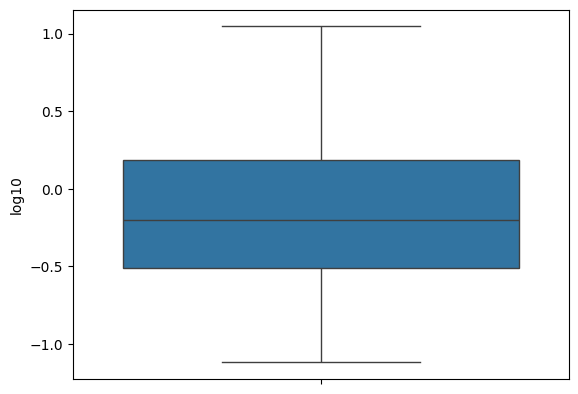

In [ ]:
sns.boxplot(df1['log10'])

# **Creating daily averages, peak hours, or rolling averages**

In [ ]:
# Combine Date and Time into a single datetime column for easier manipulation
data['Datetime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

In [ ]:
data.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Year  \
0              18.4             0.0             1.0            17.0  2006   
1              23.0             0.0             1.0            16.0  2006   
2              23.0             0.0             2.0            17.0  2006   
3              23.0             0.0             1.0            17.0  2006   
4              15.8             0.0             1.0            17.0  2006   

   Month  Day            Datetime  
0     12   16 2006-12-16 17:24:00  
1     12   16 2006-12-16 17:25:00  
2     12   16 2006-12-16 17:26:00  
3     12   16 2006-12-16 17:27:00  
4     12   16 2006-12-16 17:28:00

In [ ]:
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')

In [ ]:
# Create Daily Averages
daily_avg = data.groupby('Date')['Global_active_power'].mean().reset_index()

In [ ]:
daily_avg.rename(columns={'Global_active_power': 'Daily_Average_Power'}, inplace=True)

In [ ]:
data.head()

Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16  17:24:00                4.216                  0.418   234.84   
1 2006-12-16  17:25:00                5.360                  0.436   233.63   
2 2006-12-16  17:26:00                5.374                  0.498   233.29   
3 2006-12-16  17:27:00                5.388                  0.502   233.74   
4 2006-12-16  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  Year  \
0              18.4             0.0             1.0            17.0  2006   
1              23.0             0.0             1.0            16.0  2006   
2              23.0             0.0             2.0            17.0  2006   
3              23.0             0.0             1.0            17.0  2006   
4              15.8             0.0             1.0            17.0  2006   

   Month  Day            Datetime  
0     12   16 2006-12-16 17:24:00  
1     12   16 2006-12-16 17:25:00  
2     12   16 2006-12-16 17:26:00  
3     12   16 2006-12-16 17:27:00  
4     12   16 2006-12-16 17:28:00

In [ ]:
data['Global_active_power'].fillna(data['Global_active_power'].mean(), inplace=True)

In [ ]:
data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
Month                    0
Day                      0
Datetime                 0
dtype: int64

In [ ]:
data[data['Datetime'].isnull()]

Empty DataFrame
Columns: [Date, Time, Global_active_power, Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Year, Month, Day, Datetime]
Index: []

In [ ]:
data.sort_index(inplace=True)

In [ ]:
data.set_index('Datetime', inplace=True)

In [ ]:
peak_hours = data.resample('D')['Global_active_power'].idxmax()

In [ ]:
peak_hours_df = data.loc[peak_hours][['Global_active_power']]
peak_hours_df.rename(columns={'Global_active_power': 'Peak_Hour_Power'}, inplace=True)

In [ ]:
# Merge daily averages and peak hours back to original DataFrame
data.reset_index(inplace=True)
data = data.merge(daily_avg, on='Date', how='left')
data = data.merge(peak_hours_df, on='Datetime', how='left')

In [ ]:
data.head()

Datetime       Date      Time  Global_active_power  \
0 2006-12-16 17:24:00 2006-12-16  17:24:00                4.216   
1 2006-12-16 17:25:00 2006-12-16  17:25:00                5.360   
2 2006-12-16 17:26:00 2006-12-16  17:26:00                5.374   
3 2006-12-16 17:27:00 2006-12-16  17:27:00                5.388   
4 2006-12-16 17:28:00 2006-12-16  17:28:00                3.666   

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.418   234.84              18.4             0.0   
1                  0.436   233.63              23.0             0.0   
2                  0.498   233.29              23.0             0.0   
3                  0.502   233.74              23.0             0.0   
4                  0.528   235.68              15.8             0.0   

   Sub_metering_2  Sub_metering_3  Year  Month  Day  Daily_Average_Power  \
0             1.0            17.0  2006     12   16             3.053475   
1             1.0            16.0  2006     12   16             3.053475   
2             2.0            17.0  2006     12   16             3.053475   
3             1.0            17.0  2006     12   16             3.053475   
4             1.0            17.0  2006     12   16             3.053475   

   Peak_Hour_Power  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN

In [ ]:
# Calculate Rolling Averages
time_window = 2  # Specify a 2-hour rolling window
data['Rolling_Avg_Power'] = data['Global_active_power'].rolling(window=time_window).mean()

In [ ]:
data.isnull().sum()

Datetime                     0
Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3               0
Year                         0
Month                        0
Day                          0
Daily_Average_Power          0
Peak_Hour_Power          32169
Rolling_Avg_Power            1
dtype: int64

In [ ]:
mean_values = data[['Peak_Hour_Power', 'Rolling_Avg_Power']].mean()

In [ ]:
data.fillna(mean_values, inplace=True)

In [ ]:
data.isnull().sum()

Datetime                 0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
Month                    0
Day                      0
Daily_Average_Power      0
Peak_Hour_Power          0
Rolling_Avg_Power        0
dtype: int64

# **Standardization and Normalization**

In [ ]:
np.std(data['Global_active_power'])

1.3552212937231367

In [ ]:
np.std(data['Global_active_power']) / (data['Global_active_power'].mean())*100

80.1604603082194

<Axes: xlabel='Global_active_power', ylabel='Density'>

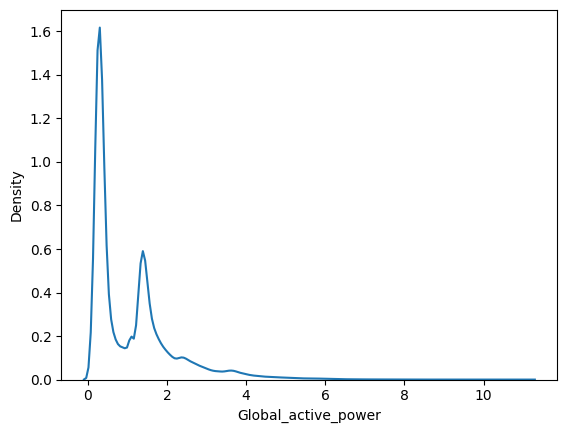

In [ ]:
sns.kdeplot(data['Global_active_power'])

# **Visualization**

# Pie Chart

In [ ]:
data['Year'].unique()

array([2006, 2007, 2008, 2009, 2010], dtype=int32)

In [ ]:
pie_data = data.groupby('Year').agg({
    'Global_active_power':'count'
}).reset_index()

In [ ]:
pie_data

Year  Global_active_power
0  2006                21996
1  2007               525600
2  2008               527040
3  2009               525600
4  2010               130183

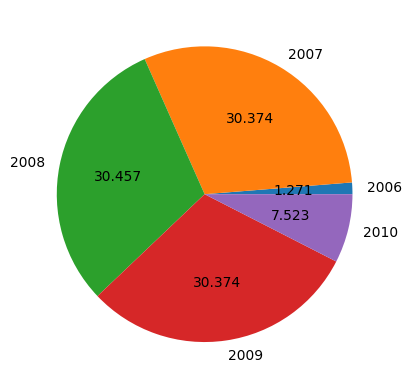

In [ ]:
import matplotlib.pyplot as plt

plt.pie(pie_data['Global_active_power'], labels=pie_data['Year'], autopct = '%1.3f')

plt.show()

# **Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss = StandardScaler()

In [ ]:
ss.fit_transform(data[['Global_active_power']])

array([[ 2.97374903],
       [ 4.06259337],
       [ 4.07591839],
       ...,
       [-0.1462088 ],
       [-0.15001594],
       [-0.15191952]])

In [ ]:
s_mean = data['Global_active_power'].mean()

In [ ]:
std_scale = (1000000 - s_mean) / np.std(data['Global_active_power'])

In [ ]:
std_scale

951785.9734337259

# **Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mm = MinMaxScaler()

In [ ]:
mm.fit_transform(data[['Global_active_power']])

array([[0.37479631],
       [0.47836321],
       [0.47963064],
       ...,
       [0.0780373 ],
       [0.07767518],
       [0.07749412]])

# **Linear Regression**

In [ ]:
data.head()

Datetime       Date      Time  Global_active_power  \
0 2006-12-16 17:24:00 2006-12-16  17:24:00                4.216   
1 2006-12-16 17:25:00 2006-12-16  17:25:00                5.360   
2 2006-12-16 17:26:00 2006-12-16  17:26:00                5.374   
3 2006-12-16 17:27:00 2006-12-16  17:27:00                5.388   
4 2006-12-16 17:28:00 2006-12-16  17:28:00                3.666   

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.418   234.84              18.4             0.0   
1                  0.436   233.63              23.0             0.0   
2                  0.498   233.29              23.0             0.0   
3                  0.502   233.74              23.0             0.0   
4                  0.528   235.68              15.8             0.0   

   Sub_metering_2  Sub_metering_3  Year  Month  Day  Daily_Average_Power  \
0             1.0            17.0  2006     12   16             3.053475   
1             1.0            16.0  2006     12   16             3.053475   
2             2.0            17.0  2006     12   16             3.053475   
3             1.0            17.0  2006     12   16             3.053475   
4             1.0            17.0  2006     12   16             3.053475   

   Peak_Hour_Power  Rolling_Avg_Power  
0         6.513917            1.76868  
1         6.513917            4.78800  
2         6.513917            5.36700  
3         6.513917            5.38100  
4         6.513917            4.52700

# **Checking Correlation**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
corr = data.corr(numeric_only=True)

In [ ]:
data.head()

Datetime       Date      Time  Global_active_power  \
0 2006-12-16 17:24:00 2006-12-16  17:24:00                4.216   
1 2006-12-16 17:25:00 2006-12-16  17:25:00                5.360   
2 2006-12-16 17:26:00 2006-12-16  17:26:00                5.374   
3 2006-12-16 17:27:00 2006-12-16  17:27:00                5.388   
4 2006-12-16 17:28:00 2006-12-16  17:28:00                3.666   

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.418   234.84              18.4             0.0   
1                  0.436   233.63              23.0             0.0   
2                  0.498   233.29              23.0             0.0   
3                  0.502   233.74              23.0             0.0   
4                  0.528   235.68              15.8             0.0   

   Sub_metering_2  Sub_metering_3  Year  Month  Day  Daily_Average_Power  \
0             1.0            17.0  2006     12   16             3.053475   
1             1.0            16.0  2006     12   16             3.053475   
2             2.0            17.0  2006     12   16             3.053475   
3             1.0            17.0  2006     12   16             3.053475   
4             1.0            17.0  2006     12   16             3.053475   

   Peak_Hour_Power  Rolling_Avg_Power  
0         6.513917            1.76868  
1         6.513917            4.78800  
2         6.513917            5.36700  
3         6.513917            5.38100  
4         6.513917            4.52700

In [ ]:
corr = data.corr(numeric_only=True)

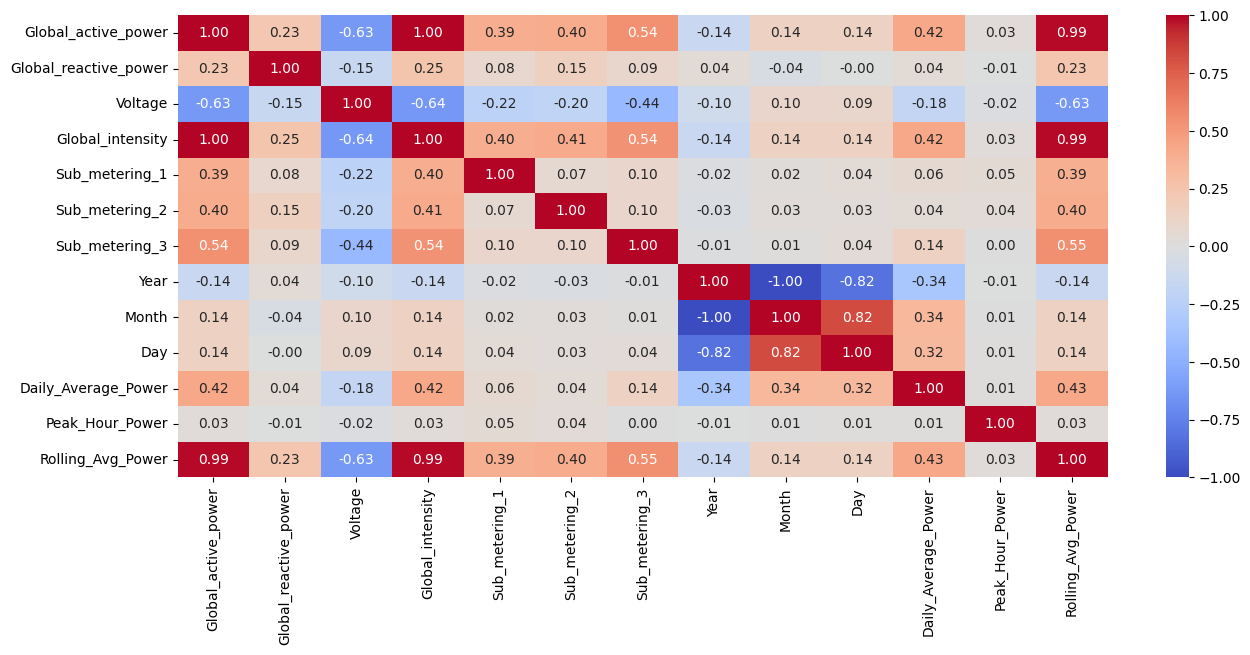

In [ ]:
plt.figure(figsize =(15,6))
sns.heatmap(corr, cmap = 'coolwarm',annot=True, fmt=".2f")
plt.show()

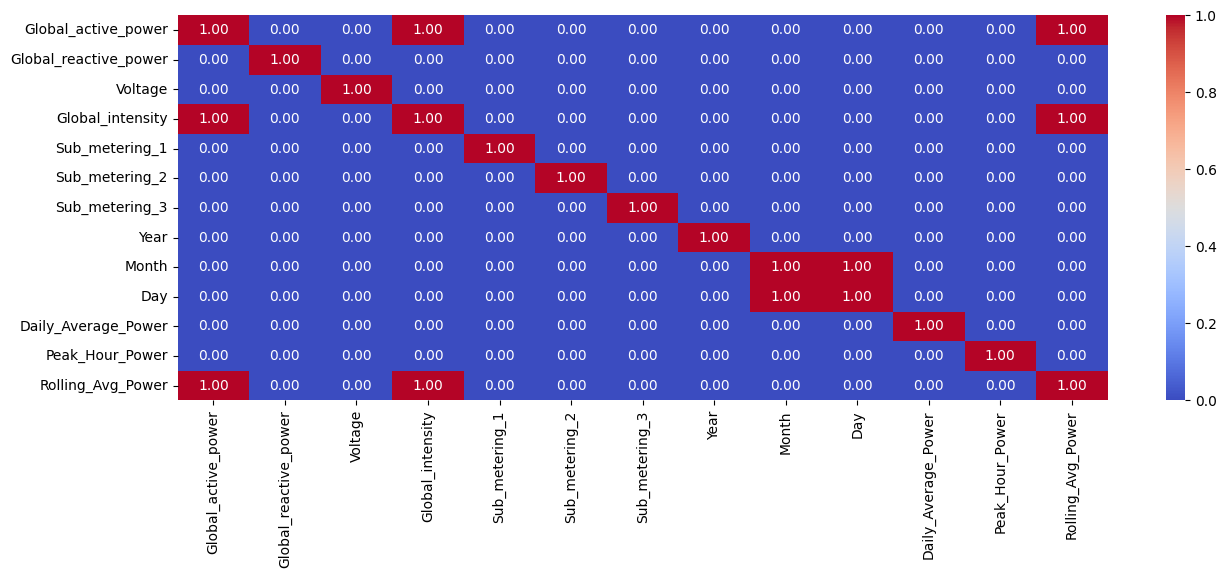

In [ ]:
plt.figure(figsize =(15,5))
sns.heatmap(corr>0.6, cmap = 'coolwarm', annot=True, fmt=".2f")
plt.show()

In [ ]:
data.drop(['Global_intensity','Sub_metering_3','Rolling_Avg_Power'], axis=1, inplace=True)

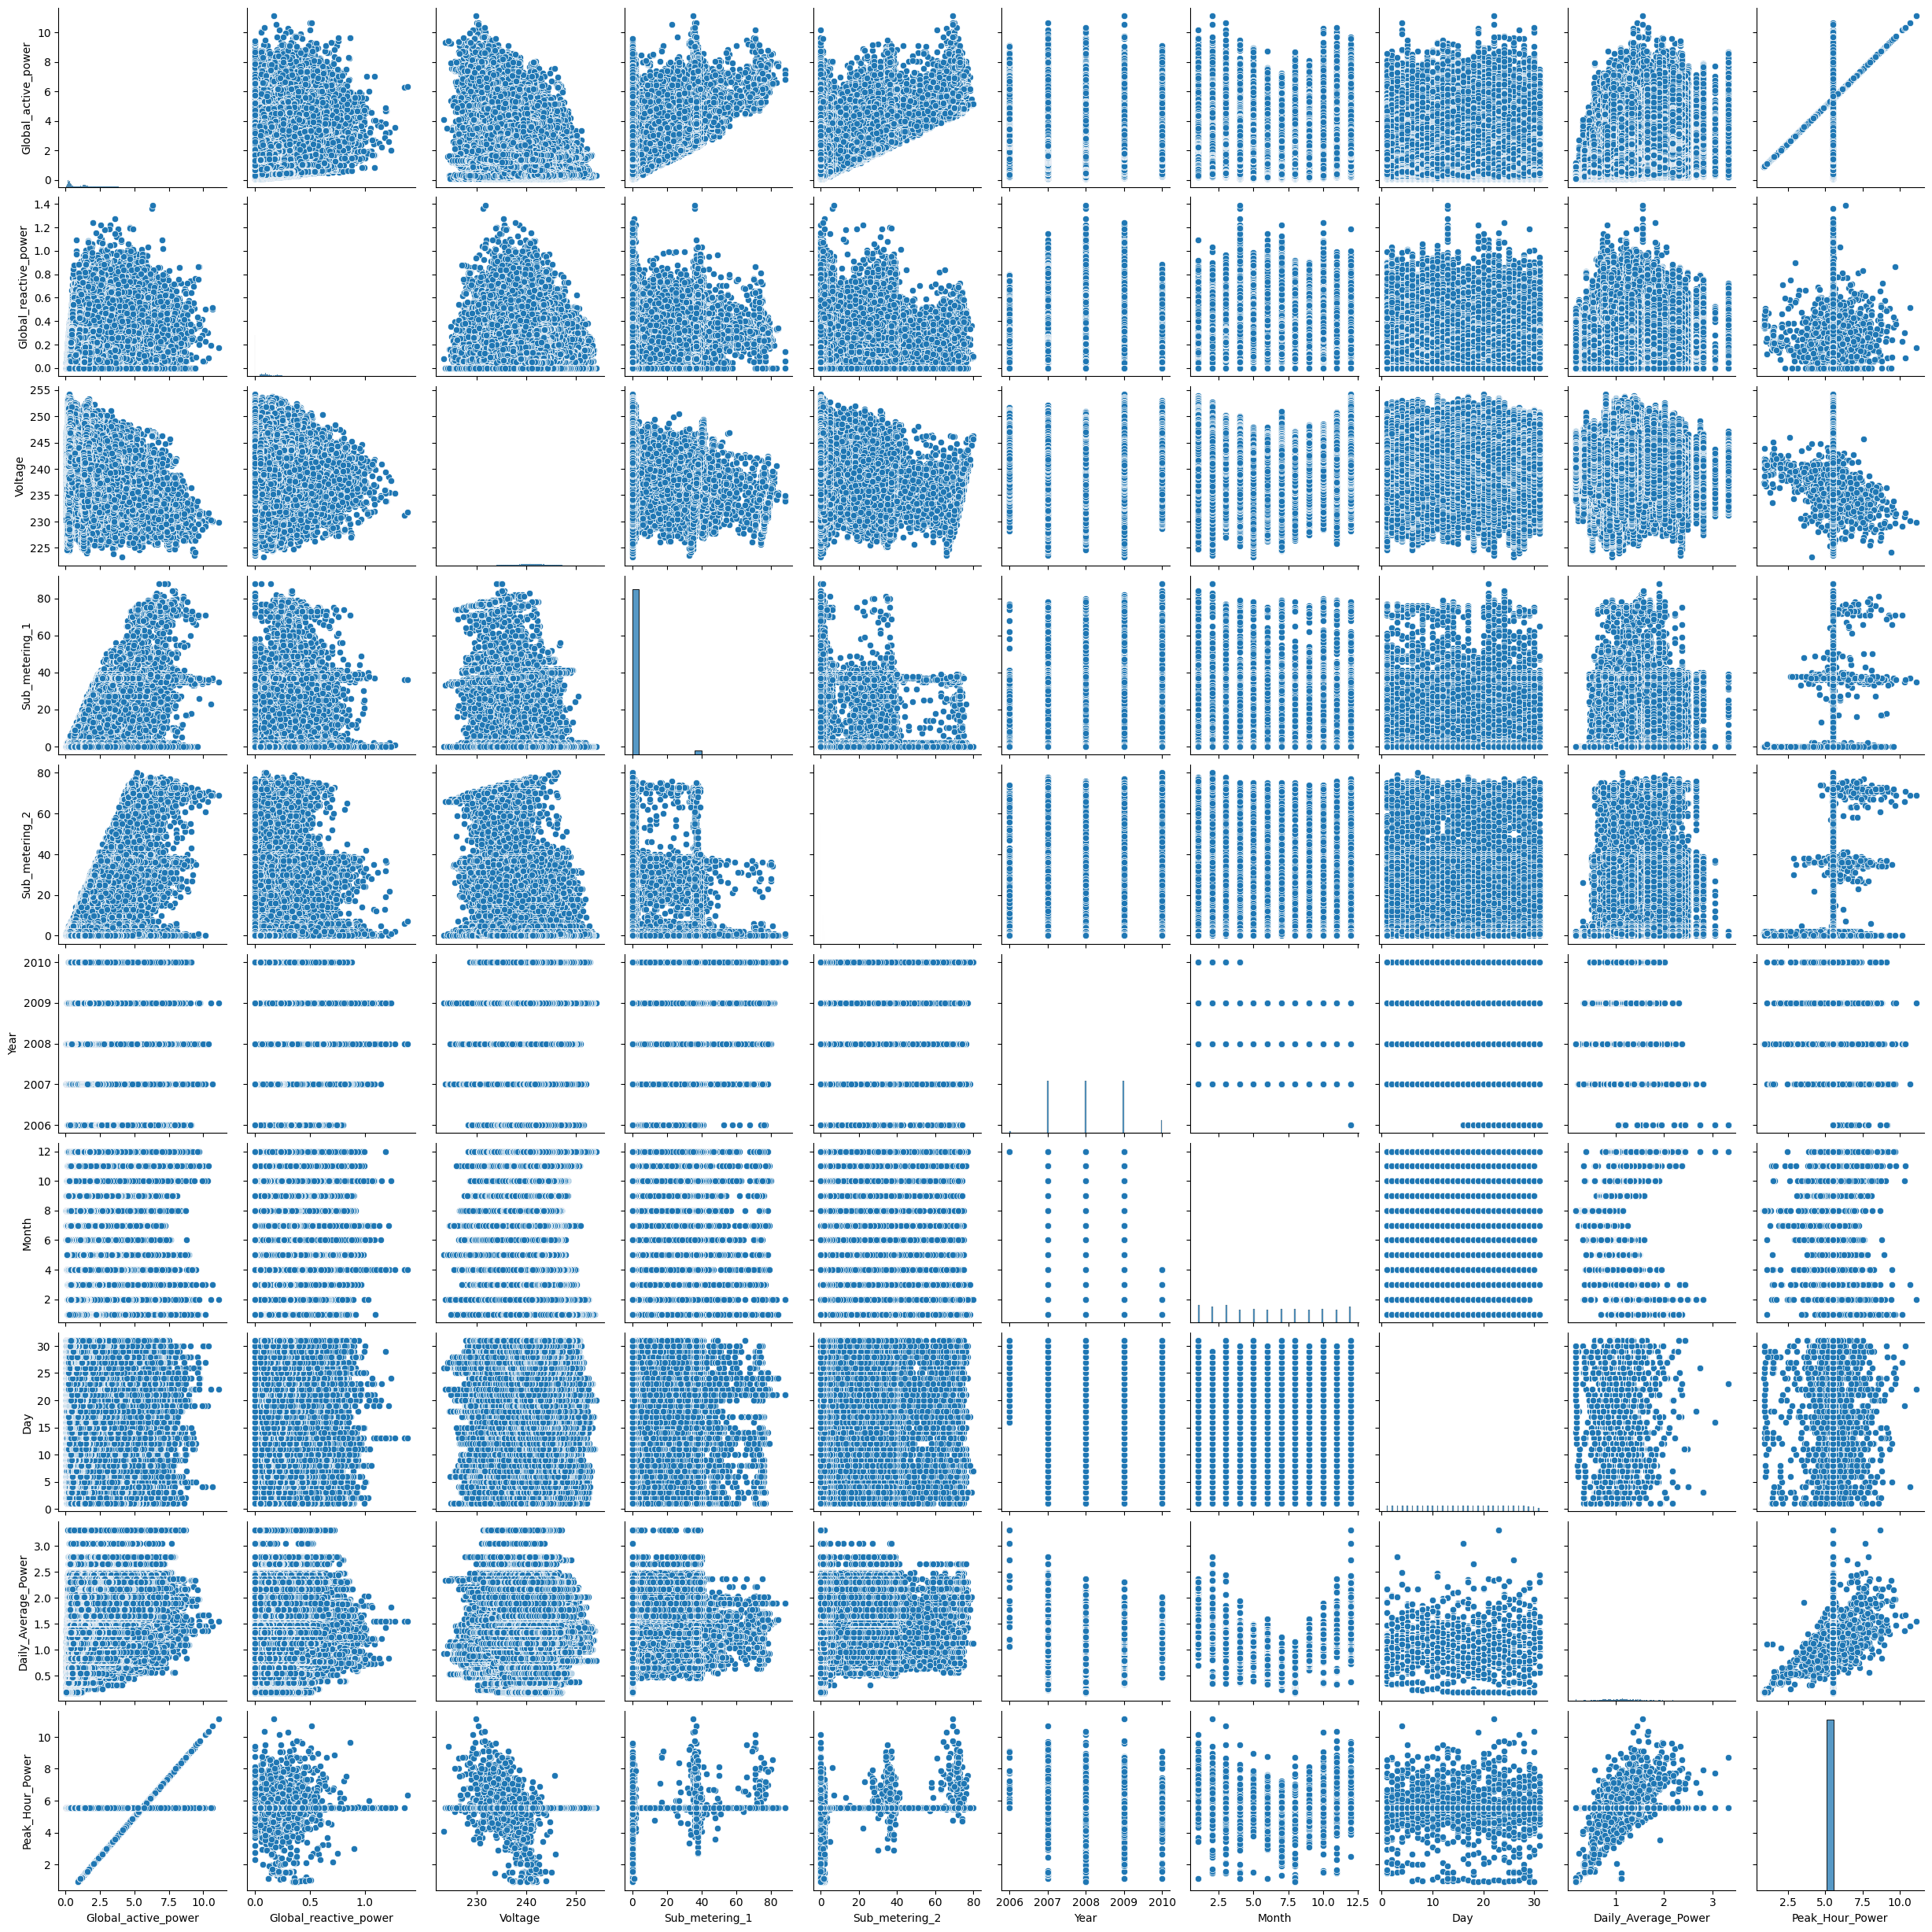

In [ ]:
sns.pairplot(data)

In [ ]:
data.columns

Index(['Datetime', 'Date', 'Time', 'Global_active_power',
       'Global_reactive_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2',
       'Year', 'Month', 'Day', 'Daily_Average_Power', 'Peak_Hour_Power'],
      dtype='object')

In [ ]:
data.isnull().sum()

Datetime                 0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Sub_metering_1           0
Sub_metering_2           0
Year                     0
Month                    0
Day                      0
Daily_Average_Power      0
Peak_Hour_Power          0
dtype: int64

# **Train-Test Split**

In [ ]:
l_val = data.drop(['Global_active_power'], axis=1)
l_target = data['Global_active_power']

In [ ]:
l_val.head()

Datetime       Date      Time  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00 2006-12-16  17:24:00                  0.418   234.84   
1 2006-12-16 17:25:00 2006-12-16  17:25:00                  0.436   233.63   
2 2006-12-16 17:26:00 2006-12-16  17:26:00                  0.498   233.29   
3 2006-12-16 17:27:00 2006-12-16  17:27:00                  0.502   233.74   
4 2006-12-16 17:28:00 2006-12-16  17:28:00                  0.528   235.68   

   Sub_metering_1  Sub_metering_2  Year  Month  Day  Daily_Average_Power  \
0             0.0             1.0  2006     12   16             3.053475   
1             0.0             1.0  2006     12   16             3.053475   
2             0.0             2.0  2006     12   16             3.053475   
3             0.0             1.0  2006     12   16             3.053475   
4             0.0             1.0  2006     12   16             3.053475   

   Peak_Hour_Power  
0         6.513917  
1         6.513917  
2         6.513917  
3         6.513917  
4         6.513917

In [ ]:
l_val = l_val.select_dtypes(include=[np.number])

In [ ]:
l_val.head()

Global_reactive_power  Voltage  Sub_metering_1  Sub_metering_2  Year  \
0                  0.418   234.84             0.0             1.0  2006   
1                  0.436   233.63             0.0             1.0  2006   
2                  0.498   233.29             0.0             2.0  2006   
3                  0.502   233.74             0.0             1.0  2006   
4                  0.528   235.68             0.0             1.0  2006   

   Month  Day  Daily_Average_Power  Peak_Hour_Power  
0     12   16             3.053475         6.826571  
1     12   16             3.053475         6.826571  
2     12   16             3.053475         6.826571  
3     12   16             3.053475         6.826571  
4     12   16             3.053475         6.826571

In [ ]:
l_target.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(l_val, l_target, test_size=0.20, random_state=67)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(train_data, train_label)

LinearRegression()

In [ ]:
train_prediction = model.predict(train_data)
test_prediction = model.predict(test_data)

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def performance(label, predict):
    mape = mean_absolute_error(label, predict)
    rmse = root_mean_squared_error(label, predict)
    r2score = r2_score(label, predict)

    print("mape:",mape*100)
    print("rmse:",rmse*100)
    print("r2score:",r2score*100)

In [ ]:
performance(train_label, train_prediction)
performance(test_label, test_prediction)

mape: 63.13773033108314
rmse: 80.23723173430236
r2score: 64.7496165272523
mape: 62.92696252936377
rmse: 79.82223074436929
r2score: 66.04951546252623


# **Random Forest Regressor**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
r_val = data.drop(['Global_active_power'], axis=1)
r_target = data['Global_active_power']

In [ ]:
r_val = r_val.select_dtypes(include=[np.number])

In [ ]:
r_val.head()

Global_reactive_power  Voltage  Sub_metering_1  Sub_metering_2  Year  \
0                  0.418   234.84             0.0             1.0  2006   
1                  0.436   233.63             0.0             1.0  2006   
2                  0.498   233.29             0.0             2.0  2006   
3                  0.502   233.74             0.0             1.0  2006   
4                  0.528   235.68             0.0             1.0  2006   

   Month  Day  Daily_Average_Power  Peak_Hour_Power  
0     12   16             3.053475         6.826571  
1     12   16             3.053475         6.826571  
2     12   16             3.053475         6.826571  
3     12   16             3.053475         6.826571  
4     12   16             3.053475         6.826571

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train_data, test_data, train_label, test_label = train_test_split(r_val, r_target, random_state=45, test_size=0.20)

In [ ]:
train_data.head()

Global_reactive_power  Voltage  Sub_metering_1  Sub_metering_2  Year  \
20640                  0.118   239.40             0.0             0.0  2006   
21444                  0.184   241.06             0.0             1.0  2006   
10318                  0.372   241.65             0.0             0.0  2006   
44816                  0.056   236.83             0.0             0.0  2007   
21673                  0.000   233.94             0.0             0.0  2006   

       Month  Day  Daily_Average_Power  Peak_Hour_Power  
20640     12   31             2.426525         6.725474  
21444     12   31             2.426525         6.725474  
10318     12   23             3.314851         6.725474  
44816      1   16             1.171114         6.725474  
21673     12   31             2.426525         6.725474

In [ ]:
model = RandomForestRegressor(random_state=77)

In [ ]:
model.fit(r_val, r_target)

RandomForestRegressor(random_state=77)

In [ ]:
train_prediction = model.predict(train_data)
test_prediction = model.predict(test_data)

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def performance(label, predict):
    mape = mean_absolute_error(label, predict)
    rmse = root_mean_squared_error(label, predict)
    r2score = r2_score(label, predict)

    print("mape:",mape*100)
    print("rmse:",rmse*100)
    print("r2score:",r2score*100)

In [ ]:
performance(train_label, train_prediction)
performance(test_label, test_prediction)

mape: 14.8860103090144
rmse: 24.286006525155855
r2score: 96.77489537846762
mape: 14.810034700682174
rmse: 24.05457725022578
r2score: 96.90166502144461


In [ ]:
test_label.mean()

1.7075626882414299

# **Feature Importance**

In [ ]:
train_data.head()

Global_reactive_power  Voltage  Sub_metering_1  Sub_metering_2  Year  \
20640                  0.118   239.40             0.0             0.0  2006   
21444                  0.184   241.06             0.0             1.0  2006   
10318                  0.372   241.65             0.0             0.0  2006   
44816                  0.056   236.83             0.0             0.0  2007   
21673                  0.000   233.94             0.0             0.0  2006   

       Month  Day  Daily_Average_Power  Peak_Hour_Power  
20640     12   31             2.426525         6.725474  
21444     12   31             2.426525         6.725474  
10318     12   23             3.314851         6.725474  
44816      1   16             1.171114         6.725474  
21673     12   31             2.426525         6.725474

In [ ]:
model.feature_importances_

array([0.10407018, 0.4596362 , 0.1106766 , 0.12577789, 0.00308873,
       0.00706467, 0.04958727, 0.13734363, 0.00275482])

In [ ]:
pd.DataFrame({
    'columns':train_data.columns,
    'scores':model.feature_importances_
}).sort_values('scores', ascending=False)

columns    scores
1                Voltage  0.459636
7    Daily_Average_Power  0.137344
3         Sub_metering_2  0.125778
2         Sub_metering_1  0.110677
0  Global_reactive_power  0.104070
6                    Day  0.049587
5                  Month  0.007065
4                   Year  0.003089
8        Peak_Hour_Power  0.002755

In [ ]:
selected_columns = pd.DataFrame({
    'columns':train_data.columns,
    'scores':model.feature_importances_
}).sort_values('scores', ascending=False).head(5)['columns'].to_list()

In [ ]:
selected_columns

['Voltage',
 'Daily_Average_Power',
 'Sub_metering_2',
 'Sub_metering_1',
 'Global_reactive_power']

# **split train and test**

In [ ]:
selected_val = r_val[selected_columns]

selected_tar = r_target

In [ ]:
train_data, test_data, train_lab, test_lab = train_test_split(selected_val, selected_tar, test_size=0.20, random_state=77)

# **building model**

In [ ]:
model = RandomForestRegressor(n_estimators=300, random_state=88, max_depth=5)
model

RandomForestRegressor(max_depth=5, n_estimators=300, random_state=88)

In [ ]:
model.fit(train_data, train_lab)

RandomForestRegressor(max_depth=5, n_estimators=300, random_state=88)

In [ ]:
def performance(label, predict):
    mape = mean_absolute_error(label, predict)
    rmse = root_mean_squared_error(label, predict)
    r2score = r2_score(label, predict)

    print("mape:",mape)
    print("rmse:",rmse)
    print("r2score:",r2score)

In [ ]:
performance(train_lab, train_prediction)
performance(test_lab, test_prediction)

mape: 1.432633289195786
rmse: 1.8676713621348617
r2score: -0.9051700896745076
mape: 1.442184651301636
rmse: 1.8823581127732558
r2score: -0.9058035265901045


In [ ]:
test_lab.mean()

1.7055815458168817

# **Tuning model - Hyper Parameter**

# **Random Search**

In [ ]:
param = {
    "n_estimators":[50, 100,200,250,300],
    "max_depth": [None, 4,5,6,7],
    "min_samples_split": [2,3,4,5,6],
    "max_features": [1,2,3,4,5]
}

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions = param,
    cv = 5,
    n_iter=60
)

In [ ]:
random_search.fit(train_data, train_lab)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=77),
                   n_iter=60,
                   param_distributions={'max_depth': [None, 4, 5, 6, 7],
                                        'max_features': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 200, 250,
                                                         300]})

In [ ]:
random_search.best_estimator_

RandomForestRegressor(max_features=3, min_samples_split=5, n_estimators=200,
                      random_state=77)

above is the best estimator

In [ ]:
tuned_model = random_search.best_estimator_

In [ ]:
random_search.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'max_features': 3,
 'max_depth': None}

# **prediction on tuned model with Random Search**

In [ ]:
def performance(label, predict):
    mape = mean_absolute_error(label, predict)
    rmse = root_mean_squared_error(label, predict)
    r2score = r2_score(label, predict)

    print("mape:",mape*100)
    print("rmse:",rmse*100)
    print("r2score:",r2score*100)

In [ ]:
tr_pred = tuned_model.predict(train_data)
ts_pred = tuned_model.predict(test_data)

In [ ]:
performance(train_lab, tr_pred)
performance(test_lab, ts_pred)

mape: 22.870153522928614
rmse: 35.06676774934588
r2score: 93.37407129766733
mape: 43.04772374763356
rmse: 66.10083369075289
r2score: 76.37079569524701


# **Tuning with Grid search**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
param = {
    "n_estimators":[50, 100,200,250,300],
    "max_depth": [None, 4,5,6,7],
    "min_samples_split": [2,3,4,5,6],
    "max_features": [1,2,3,4,5]
}

In [ ]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid = param,
    cv = 5,
)

In [ ]:
grid_search.fit(train_data, train_lab)

# **Neural Network**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as opt
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
data.head()

Datetime       Date      Time  Global_active_power  \
0 2006-12-16 17:24:00 2006-12-16  17:24:00                4.216   
1 2006-12-16 17:25:00 2006-12-16  17:25:00                5.360   
2 2006-12-16 17:26:00 2006-12-16  17:26:00                5.374   
3 2006-12-16 17:27:00 2006-12-16  17:27:00                5.388   
4 2006-12-16 17:28:00 2006-12-16  17:28:00                3.666   

   Global_reactive_power  Voltage  Global_intensity  Sub_metering_1  \
0                  0.418   234.84              18.4             0.0   
1                  0.436   233.63              23.0             0.0   
2                  0.498   233.29              23.0             0.0   
3                  0.502   233.74              23.0             0.0   
4                  0.528   235.68              15.8             0.0   

   Sub_metering_2  Sub_metering_3  Year  Month  Day  Daily_Average_Power  \
0             1.0            17.0  2006     12   16             3.053475   
1             1.0            16.0  2006     12   16             3.053475   
2             2.0            17.0  2006     12   16             3.053475   
3             1.0            17.0  2006     12   16             3.053475   
4             1.0            17.0  2006     12   16             3.053475   

   Peak_Hour_Power  Rolling_Avg_Power  
0         5.539729           1.115505  
1         5.539729           4.788000  
2         5.539729           5.367000  
3         5.539729           5.381000  
4         5.539729           4.527000

In [ ]:
data.isnull().sum()

Datetime                 0
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Year                     0
Month                    0
Day                      0
Daily_Average_Power      0
Peak_Hour_Power          0
Rolling_Avg_Power        0
dtype: int64

In [ ]:
corr = data.corr(numeric_only=True)

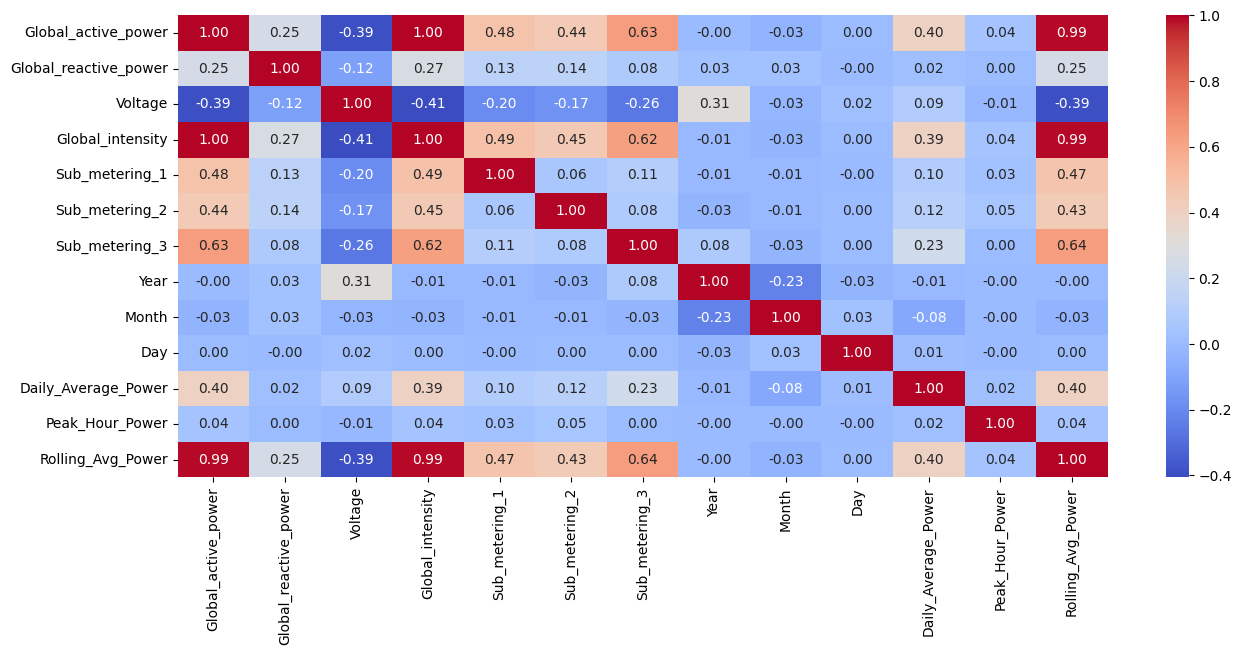

In [ ]:
plt.figure(figsize =(15,6))
sns.heatmap(corr, cmap = 'coolwarm',annot=True, fmt=".2f")
plt.show()

In [ ]:
data.drop(['Global_intensity','Sub_metering_3','Rolling_Avg_Power'], axis=1, inplace=True)

In [ ]:
n_val = data.drop('Global_active_power', axis =1)

n_tar = data['Global_active_power']

In [ ]:
n_val = n_val.select_dtypes(include=[np.number])

In [ ]:
n_val

Global_reactive_power  Voltage  Sub_metering_1  Sub_metering_2  Year  \
0                        0.418   234.84             0.0             1.0  2006   
1                        0.436   233.63             0.0             1.0  2006   
2                        0.498   233.29             0.0             2.0  2006   
3                        0.502   233.74             0.0             1.0  2006   
4                        0.528   235.68             0.0             1.0  2006   
...                        ...      ...             ...             ...   ...   
1730414                  0.054   242.00             0.0             0.0  2010   
1730415                  0.054   242.09             0.0             0.0  2010   
1730416                  0.054   241.67             0.0             0.0  2010   
1730417                  0.052   241.07             0.0             0.0  2010   
1730418                  0.132   241.22             0.0             0.0  2010   

         Month  Day  Daily_Average_Power  Peak_Hour_Power  
0           12   16             3.053475         5.539729  
1           12   16             3.053475         5.539729  
2           12   16             3.053475         5.539729  
3           12   16             3.053475         5.539729  
4           12   16             3.053475         5.539729  
...        ...  ...                  ...              ...  
1730414      4    1             0.832309         5.539729  
1730415      4    1             0.832309         5.539729  
1730416      4    1             0.832309         5.539729  
1730417      4    1             0.832309         5.539729  
1730418      4    1             0.832309         5.539729  

[1730419 rows x 9 columns]

# Converting to Tensor

In [ ]:
val_ten = torch.tensor(n_val.values, dtype = torch.float32)
tar_ten = torch.tensor(n_tar.values, dtype = torch.float32)

In [ ]:
val_ten.shape

torch.Size([1730419, 9])

# **Dataset Creation**

In [ ]:
train_dataset = TensorDataset(val_ten, tar_ten)

# **Data Loader**

In [ ]:
loaded_data = DataLoader(dataset=train_dataset, batch_size=10, shuffle=True)

# **Building Model**

In [ ]:
model = nn.Sequential(


                      nn.Linear(9,70),
                      nn.ReLU(),
                      nn.Dropout(0.3),

                      nn.Linear(70,50),
                      nn.ReLU(),
                      nn.Dropout(0.3),

                      nn.Linear(50,40),
                      nn.ReLU(),
                      nn.Dropout(0.3),

                      nn.Linear(40,35),
                      nn.ReLU(),

                      nn.Linear(35,20),
                      nn.LeakyReLU(0.3),

                      nn.Linear(20,15),
                      nn.ReLU(),
                      nn.Dropout(0.3),

                      nn.Linear(15,5),
                      nn.ReLU(),
                      nn.Dropout(0.3),

                      nn.Linear(5,1),



)

# **Optim and Loss functions**

In [ ]:
mse_loss = nn.MSELoss()
optim = opt.SGD(model.parameters(), lr=0.0001)

In [ ]:
epoch = 10
for i in range(epoch):
  # since we have a dataloader, we can pass one by one

  for val_ten, tar_ten in loaded_data:


    optim.zero_grad()
    model_output = model(val_ten)
    loss = mse_loss(model_output, tar_ten)
    loss.backward()
    optim.step()

  print(f"Epoch, {i}, outof, {epoch}, =============== loss, {loss}")

Epoch, 0, outof, 10, =============== loss, 0.6541072726249695
Epoch, 1, outof, 10, =============== loss, 0.38707950711250305
Epoch, 2, outof, 10, =============== loss, 0.5316824316978455
Epoch, 3, outof, 10, =============== loss, 1.1688224077224731
Epoch, 4, outof, 10, =============== loss, 0.8734725117683411
Epoch, 5, outof, 10, =============== loss, 1.4325700998306274
Epoch, 6, outof, 10, =============== loss, 1.215014100074768
Epoch, 7, outof, 10, =============== loss, 1.1036893129348755
Epoch, 8, outof, 10, =============== loss, 0.4259995222091675
Epoch, 9, outof, 10, =============== loss, 0.7497373223304749


# **Prediction**

In [ ]:
predction = model(val_ten)

In [ ]:
predction

tensor([[1.0981],
        [1.0574],
        [1.0801],
        [1.0880],
        [1.0898],
        [1.1088],
        [1.1088],
        [1.1021],
        [1.0963],
        [1.1088]], grad_fn=<AddmmBackward0>)

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

In [ ]:
root_mean_squared_error(tar_ten.detach().numpy(), predction.detach().numpy())

0.7356715798377991

In [ ]:
mean_absolute_percentage_error(tar_ten.detach().numpy(), predction.detach().numpy())

2.371629238128662